In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Let’s first load the Iris dataset using load_iris() function of scikit-learn library and seprate them in features and target labels. This data set has three classes Iris-setosa, Iris-versicolor, and Iris-virginica.

In [2]:
data = load_iris()

# Get features and target
X=data.data
y=data.target

Create dummy variables for class labels using get_dummies() function

In [3]:
y = pd.get_dummies(y).values

y[:3]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

Let’s split dataset by using function train_test_split(). you need to pass basically 3 parameters features, target, and test_set size. Additionally, you can use random_state in order to get the same kind of train and test set.

In [10]:
#Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)

Lets initialize the hyperparameters such as learning rate, iterations, input size, number of hidden layers, and number of output layers.

In [5]:
# Initialize variables
learning_rate = 0.1
iterations = 5000
N = y_train.size

# number of input features
input_size = 4

# number of hidden layers neurons
hidden_size = 2 

# number of neurons at the output layer
output_size = 3  

results = pd.DataFrame(columns=["mse", "accuracy"])

Lets initialize the weights for hidden and output layers with random values.

In [6]:
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

Lets create helper functions such as sigmoid, mean_square_error, and accuracy.

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In this phase, we will create backpropagation neural network in three steps feedforward propagation, error calculation and backpropagation phase. Here , we will create a for loop for given number of iterations that execute the three steps(feedforward propagation, error calculation and backpropagation phase) and update the weights in each iteration.

In [12]:
for itr in range(iterations):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    
    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    
    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

ets plot mean squared error in each iteration using pandas plot() funciton.

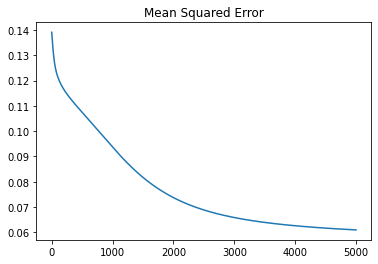

In [13]:
results.mse.plot(title="Mean Squared Error")

Lets plot accuracy in each iteration using pandas plot() funciton.

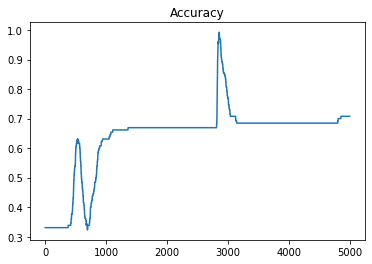

In [14]:
results.accuracy.plot(title="Accuracy")

Lets make prediction for the test data and assess the performance of Backpropagation neural network

In [16]:
# feedforward
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.8


you can see in the above output, we are getting 80% accuracy on test dataset.